# Parsing file collections
The `parse_collection` fucntion parses a collection of files following the python string formatting syntax and saves the result in a pandas DataFrame. 

The `DCAccessor` provides extra pandas functionalities available under the `dc` (data collection) accessor

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from improc.io import parse_collection, DCAccessor
DCAccessor.register()

# parsing files

In [2]:
basedir = '../data'
pattern='{well}/object_{org_idb}/{f1}_{f2}_{f3}_{plate_row}{plate_column:02d}_T{T:04d}F{field:03d}L{L:02d}A{A:02d}Z{zslice:02d}C{channel:02d}O{org_id:05d}_{layer}.{ext}'
index=["layer", "well", "channel", "org_id"]

df = parse_collection(os.path.join(basedir, pattern), index)
df

pattern  \
layer           well channel org_id                                                      
CENTER-SURROUND B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             4       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             5       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
...                                                                                ...   
TIF-OVR-MIP     B02  3       38      {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             39      {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             40      {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             41      {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                             42      {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   

                                     basedir org_idb              f1      f2  \
layer           well channel org_id                                            
CENTER-SURROUND B02  1       1       ../data       1  201102JD002AAB  201031   
                             2       ../data       2  201102JD002AAB  201031   
                             3       ../data       3  201102JD002AAB  201031   
                             4       ../data       4  201102JD002AAB  201031   
                             5       ../data       5  201102JD002AAB  201031   
...                                      ...     ...             ...     ...   
TIF-OVR-MIP     B02  3       38      ../data      38  201102JD002AAB  201031   
                             39      ../data      39  201102JD002AAB  201031   
                             40      ../data      40  201102JD002AAB  201031   
                             41      ../data      41  201102JD002AAB  201031   
                             42      ../data      42  201102JD002AAB  201031   

                                         f3 plate_row  plate_column  T  field  \
layer           well channel org_id                                             
CENTER-SURROUND B02  1       1       174004         B             2  1      1   
                             2       174004         B             2  1      1   
                             3       174004         B             2  1      1   
                             4       174004         B             2  1      1   
                             5       174004         B             2  1      1   
...                                     ...       ...           ... ..    ...   
TIF-OVR-MIP     B02  3       38      174004         B             2  1      1   
                             39      174004         B             2  1      1   
                             40      174004         B             2  1      1   
                             41      174004         B             2  1      1   
                             42      174004         B             2  1      1   

                                     L  A  zslice  ext  
layer           well channel org_id                     
CENTER-SURROUND B02  1       1       1  3       1  tif  
                             2       1  3       1  tif  
                             3       1  3       1  tif  
                             4       1  3       1  tif  
                             5       1  3       1  tif  
...                                 .. ..     ...  ...  
TIF-OVR-MIP     B02  3       38      1  3       1  tif  
                             39      1  3       1  tif  
                             40      1  3       1  tif  
                             41      1  3       1  tif  
                             42      1  3       1  tif  

[313 rows x 14 columns]

# indexing sample and recovering the original path


In [3]:
df.dc['TIF-OVR-MIP', 'B02',:,4].dc.path.tolist()

['../data/B02/object_4/201102JD002AAB_201031_174004_B02_T0001F001L01A03Z01C01O00004_TIF-OVR-MIP.tif',
 '../data/B02/object_4/201102JD002AAB_201031_174004_B02_T0001F001L01A03Z01C02O00004_TIF-OVR-MIP.tif',
 '../data/B02/object_4/201102JD002AAB_201031_174004_B02_T0001F001L01A03Z01C03O00004_TIF-OVR-MIP.tif']

# loading files corresponding to selected rows

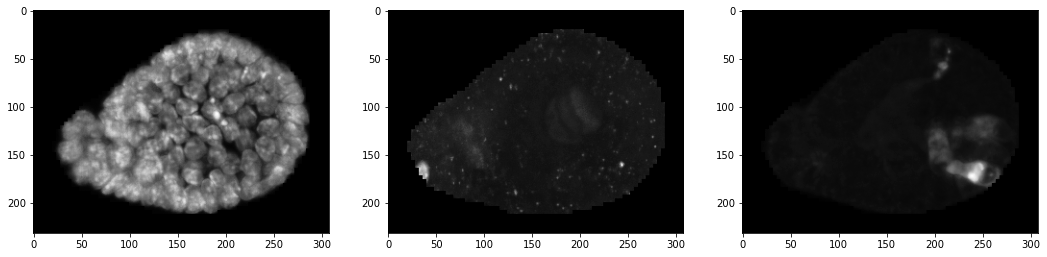

In [4]:
# load 3 intensity channels for the selected object
channel_images = df.dc['TIF-OVR-MIP', 'B02',:,4].dc.read()

fig, axs = plt.subplots(1,3, figsize=(18,6))
for img,ax in zip(channel_images, axs):
    ax.imshow(img, cmap='Greys_r')
plt.show()

In [5]:
# load and concatenate all features for well B02
props = pd.concat(df.dc['PROPS_MIP', 'B02'].dc.read()).reset_index(drop=True)
display(props)

,channel,region,object_id,feature_name,feature_value,platedir,plate_row,plate_column,org_id,condition
0,1,MASK,255,q0_000,116.000000,201031JD002regimetestAAB_20201031_173042,B,2,1,glu-glu
1,1,MASK,255,q0_001,126.000000,201031JD002regimetestAAB_20201031_173042,B,2,1,glu-glu
2,1,MASK,255,q0_250,2262.000000,201031JD002regimetestAAB_20201031_173042,B,2,1,glu-glu
3,1,MASK,255,q0_500,3260.500000,201031JD002regimetestAAB_20201031_173042,B,2,1,glu-glu
4,1,MASK,255,q0_750,4307.000000,201031JD002regimetestAAB_20201031_173042,B,2,1,glu-glu
...,...,...,...,...,...,...,...,...,...,...
19900,na,MASK,255,convexity,0.997168,201031JD002regimetestAAB_20201031_173042,B,2,42,glu-glu
19901,na,MASK,255,form_factor,0.901516,201031JD002regimetestAAB_20201031_173042,B,2,42,glu-glu
19902,1,MASK,255,mass_displacement,2.652990,201031JD002regimetestAAB_20201031_173042,B,2,42,glu-glu
19903,2,MASK,255,mass_displacement,1.440357,201031JD002regimetestAAB_20201031_173042,B,2,42,glu-glu


# writing files

An error will be raised if the output file already exist
- To skip existing files use exist_ok=True
- To replace existing files, use overwrite=True

In [6]:
# build an output DataFrame with the same path as input except the "layer" field changed to 'CH3-MASK'

subdf = df.dc['TIF-OVR-MIP', 'B02',3,4]
subdf_out = subdf.reset_index().copy()
subdf_out.layer = 'CH3-MASK'

subdf_out.dc.path[0]

'../data/B02/object_4/201102JD002AAB_201031_174004_B02_T0001F001L01A03Z01C03O00004_CH3-MASK.tif'

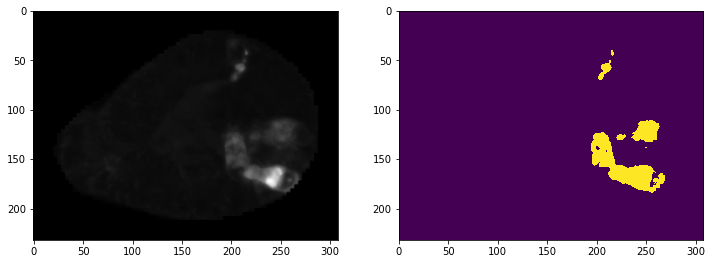

In [8]:
# dummy thresholding operation
img = subdf.dc.read()[0]
mask = img > img.mean() + 2 * img.std()

fig, axs = plt.subplots(1,2, figsize=(12,6))
axs[0].imshow(img, cmap='Greys_r')
axs[1].imshow(mask, interpolation='nearest')
plt.show()

# save the result
subdf_out.dc.write(mask.astype(np.uint16), compress=9, exist_ok=True)

# Iterating over selected samples

In [9]:
# util plotting functions

def plot_channels(imgs):
    n_img = len(imgs)
    fig, axs = plt.subplots(1,n_img, figsize=(18,18/n_img))
    for (ch_id,img), ax in zip(imgs.items(), axs):
        ax.imshow(img, cmap='Greys_r')
        ax.set_title('Channel {}'.format(ch_id))
    plt.show()
    
def plot_labels(labels):
    n_lbl = len(labels)
    fig, axs = plt.subplots(1,n_lbl, figsize=(18,18/n_lbl))
    for (lbl_id,lbl), ax in zip(labels.items(), axs):
        ax.imshow(lbl, interpolation='nearest')
        ax.set_title(lbl_id)
    plt.show()

('B02', 1)


pattern  \
layer           well channel org_id                                                      
CENTER-SURROUND B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
MASK            B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
PROPS_MIP       B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SKELETON        B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SPX             B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
TIF-OVR-MIP     B02  1       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     2       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     3       1       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   

                                     basedir org_idb              f1      f2  \
layer           well channel org_id                                            
CENTER-SURROUND B02  1       1       ../data       1  201102JD002AAB  201031   
MASK            B02  1       1       ../data       1  201102JD002AAB  201031   
PROPS_MIP       B02  1       1       ../data       1  201102JD002AAB  201031   
SKELETON        B02  1       1       ../data       1  201102JD002AAB  201031   
SPX             B02  1       1       ../data       1  201102JD002AAB  201031   
TIF-OVR-MIP     B02  1       1       ../data       1  201102JD002AAB  201031   
                     2       1       ../data       1  201102JD002AAB  201031   
                     3       1       ../data       1  201102JD002AAB  201031   

                                         f3 plate_row  plate_column  T  field  \
layer           well channel org_id                                             
CENTER-SURROUND B02  1       1       174004         B             2  1      1   
MASK            B02  1       1       174004         B             2  1      1   
PROPS_MIP       B02  1       1       174004         B             2  1      1   
SKELETON        B02  1       1       174004         B             2  1      1   
SPX             B02  1       1       174004         B             2  1      1   
TIF-OVR-MIP     B02  1       1       174004         B             2  1      1   
                     2       1       174004         B             2  1      1   
                     3       1       174004         B             2  1      1   

                                     L  A  zslice  ext  
layer           well channel org_id                     
CENTER-SURROUND B02  1       1       1  3       1  tif  
MASK            B02  1       1       1  3       1  tif  
PROPS_MIP       B02  1       1       1  3       1  csv  
SKELETON        B02  1       1       1  3       1  tif  
SPX             B02  1       1       1  3       1  tif  
TIF-OVR-MIP     B02  1       1       1  3       1  tif  
                     2       1       1  3       1  tif  
                     3       1       1  3       1  tif

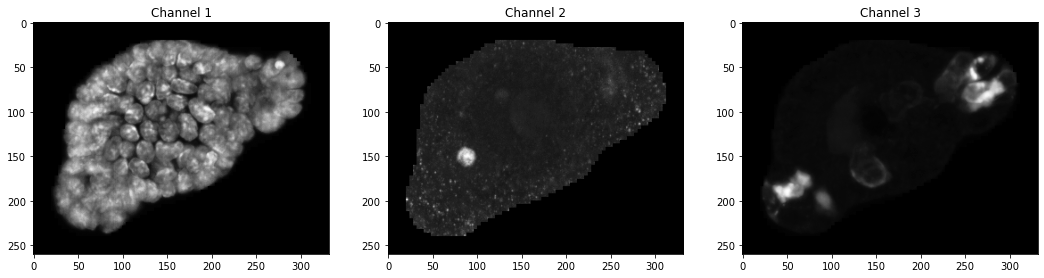

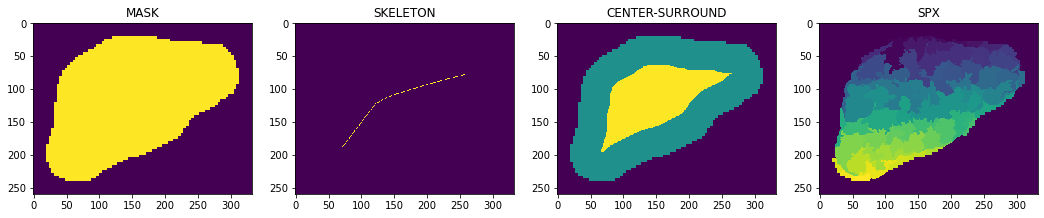




('B02', 2)


pattern  \
layer           well channel org_id                                                      
CENTER-SURROUND B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
MASK            B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
PROPS_MIP       B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SKELETON        B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SPX             B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
TIF-OVR-MIP     B02  1       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     2       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     3       2       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   

                                     basedir org_idb              f1      f2  \
layer           well channel org_id                                            
CENTER-SURROUND B02  1       2       ../data       2  201102JD002AAB  201031   
MASK            B02  1       2       ../data       2  201102JD002AAB  201031   
PROPS_MIP       B02  1       2       ../data       2  201102JD002AAB  201031   
SKELETON        B02  1       2       ../data       2  201102JD002AAB  201031   
SPX             B02  1       2       ../data       2  201102JD002AAB  201031   
TIF-OVR-MIP     B02  1       2       ../data       2  201102JD002AAB  201031   
                     2       2       ../data       2  201102JD002AAB  201031   
                     3       2       ../data       2  201102JD002AAB  201031   

                                         f3 plate_row  plate_column  T  field  \
layer           well channel org_id                                             
CENTER-SURROUND B02  1       2       174004         B             2  1      1   
MASK            B02  1       2       174004         B             2  1      1   
PROPS_MIP       B02  1       2       174004         B             2  1      1   
SKELETON        B02  1       2       174004         B             2  1      1   
SPX             B02  1       2       174004         B             2  1      1   
TIF-OVR-MIP     B02  1       2       174004         B             2  1      1   
                     2       2       174004         B             2  1      1   
                     3       2       174004         B             2  1      1   

                                     L  A  zslice  ext  
layer           well channel org_id                     
CENTER-SURROUND B02  1       2       1  3       1  tif  
MASK            B02  1       2       1  3       1  tif  
PROPS_MIP       B02  1       2       1  3       1  csv  
SKELETON        B02  1       2       1  3       1  tif  
SPX             B02  1       2       1  3       1  tif  
TIF-OVR-MIP     B02  1       2       1  3       1  tif  
                     2       2       1  3       1  tif  
                     3       2       1  3       1  tif

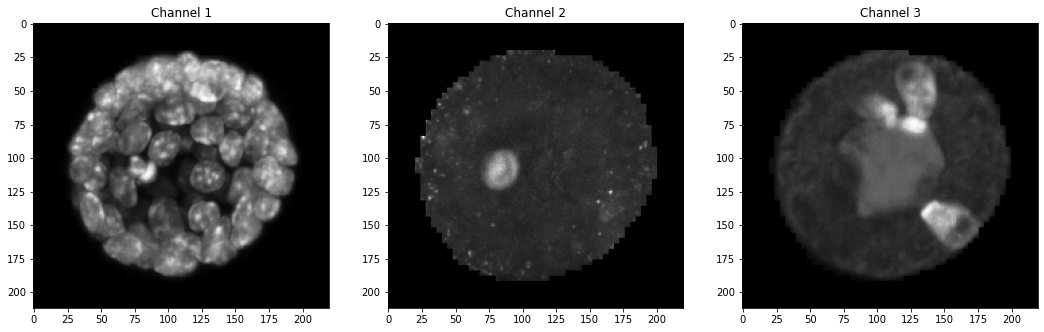

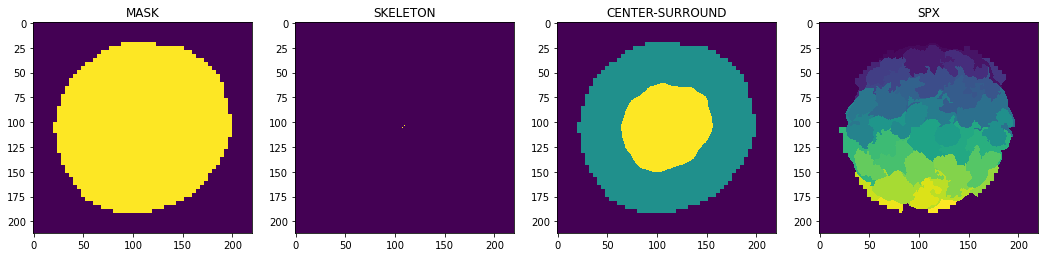




('B02', 3)


pattern  \
layer           well channel org_id                                                      
CENTER-SURROUND B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
MASK            B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
PROPS_MIP       B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SKELETON        B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
SPX             B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
TIF-OVR-MIP     B02  1       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     2       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   
                     3       3       {basedir}/{well}/object_{org_idb}/{f1}_{f2}_{f...   

                                     basedir org_idb              f1      f2  \
layer           well channel org_id                                            
CENTER-SURROUND B02  1       3       ../data       3  201102JD002AAB  201031   
MASK            B02  1       3       ../data       3  201102JD002AAB  201031   
PROPS_MIP       B02  1       3       ../data       3  201102JD002AAB  201031   
SKELETON        B02  1       3       ../data       3  201102JD002AAB  201031   
SPX             B02  1       3       ../data       3  201102JD002AAB  201031   
TIF-OVR-MIP     B02  1       3       ../data       3  201102JD002AAB  201031   
                     2       3       ../data       3  201102JD002AAB  201031   
                     3       3       ../data       3  201102JD002AAB  201031   

                                         f3 plate_row  plate_column  T  field  \
layer           well channel org_id                                             
CENTER-SURROUND B02  1       3       174004         B             2  1      1   
MASK            B02  1       3       174004         B             2  1      1   
PROPS_MIP       B02  1       3       174004         B             2  1      1   
SKELETON        B02  1       3       174004         B             2  1      1   
SPX             B02  1       3       174004         B             2  1      1   
TIF-OVR-MIP     B02  1       3       174004         B             2  1      1   
                     2       3       174004         B             2  1      1   
                     3       3       174004         B             2  1      1   

                                     L  A  zslice  ext  
layer           well channel org_id                     
CENTER-SURROUND B02  1       3       1  3       1  tif  
MASK            B02  1       3       1  3       1  tif  
PROPS_MIP       B02  1       3       1  3       1  csv  
SKELETON        B02  1       3       1  3       1  tif  
SPX             B02  1       3       1  3       1  tif  
TIF-OVR-MIP     B02  1       3       1  3       1  tif  
                     2       3       1  3       1  tif  
                     3       3       1  3       1  tif

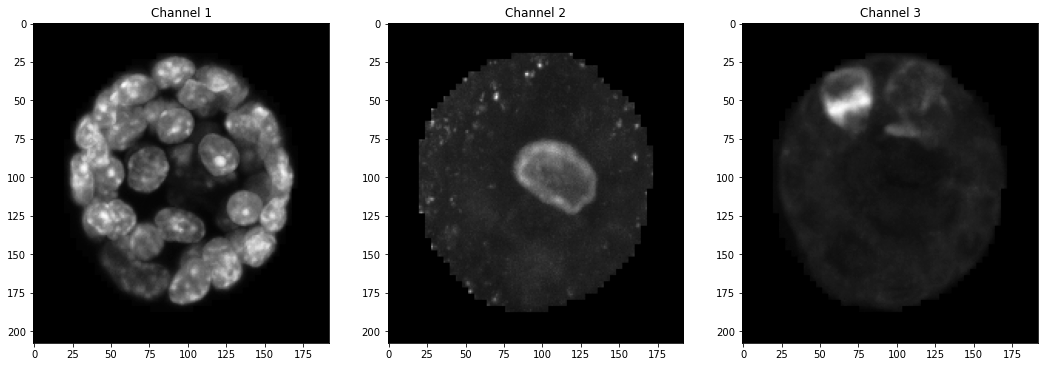

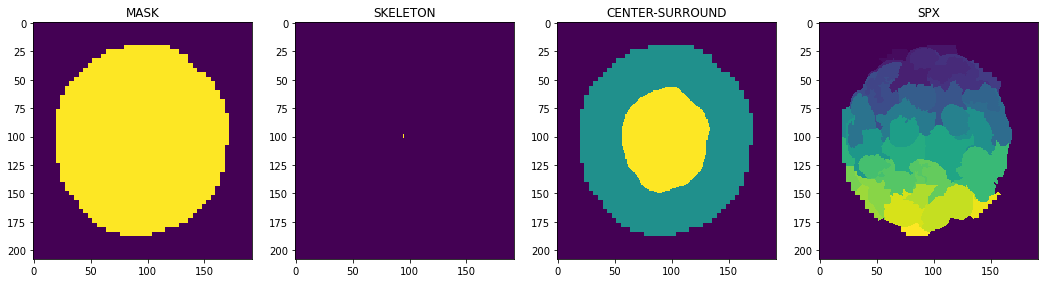

In [10]:
for idx, subdf in df.dc[:,:,:,:3].groupby(['well', 'org_id']):
    print(idx)
    display(subdf)
    
    # dict of intensity images
    imgs = {key:val for key,val in zip(subdf.dc['TIF-OVR-MIP'].index.get_level_values('channel'),
                                       subdf.dc['TIF-OVR-MIP'].dc.read())}
    
    # dict of labels
    label_keys = ['MASK', 'SKELETON', 'CENTER-SURROUND', 'SPX']
    labels = {key:val for key,val in zip(label_keys, subdf.dc[label_keys].dc.read())}
    
    plot_channels(imgs)
    plot_labels(labels)
    print('\n\n')